In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Cargar el CSV (asegúrate de reemplazar 'encuesta.csv' con el nombre de tu archivo)
df = pd.read_csv('Relavamiento estimación ágil (respuestas) - Respuestas de formulario 1.csv')
        
# Eliminar columnas irrelevantes (ejemplo: columnas por índices)
irrelevant_columns = ["Marca temporal", "Dirección de correo electrónico",
                        "Presto mi consentimiento para la recolección de datos personales necesarios para la realización de la encuesta, de acuerdo con mis derechos reconocidos en la ley 25.326 de Protección de Datos Personales.", "Nombre de la empresa/organización a la que pertenece:"]  
df = df.drop(columns=irrelevant_columns, errors='ignore')

# Inicializar etiquetas de las columnas
column_labels = {i + 1: col for i, col in enumerate(df.columns)}
        

In [10]:
df 

column_labels

{1: '¿Qué rol ocupa dentro de la organización donde trabaja actualmente?',
 2: '¿Cuántos años de experiencia tiene en desarrollo de software?',
 3: 'Indique su modalidad de trabajo actual',
 4: '¿De qué tamaño es la empresa/organización donde trabaja?',
 5: '¿En dónde se encuentra ubicada la empresa donde trabaja?',
 6: '¿Trabaja con un enfoque ágil de desarrollo de software?',
 7: '¿Cuánta experiencia tiene trabajando con prácticas ágiles?',
 8: '***Actualmente, ¿En cuantos proyectos de desarrollo de software ágil trabaja?***',
 9: '***Si trabaja en un proyecto, ¿En el mismo, participa solo el equipo al que pertenece?***',
 10: '¿Cuántos miembros tiene el equipo ágil al que pertenece?',
 11: '¿Qué roles tienen los miembros de los equipos ágiles en su empresa?',
 12: '¿Cuánta experiencia tienen, en general, los miembros de su equipo?',
 13: '¿Qué prácticas o framework ágil utiliza  su equipo?',
 14: '¿Qué herramienta o software utiliza su equipo para la gestión de proyectos? Seleccione

C:\Users\chuch\AppData\Local\Temp\ipykernel_14932\2329851731.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


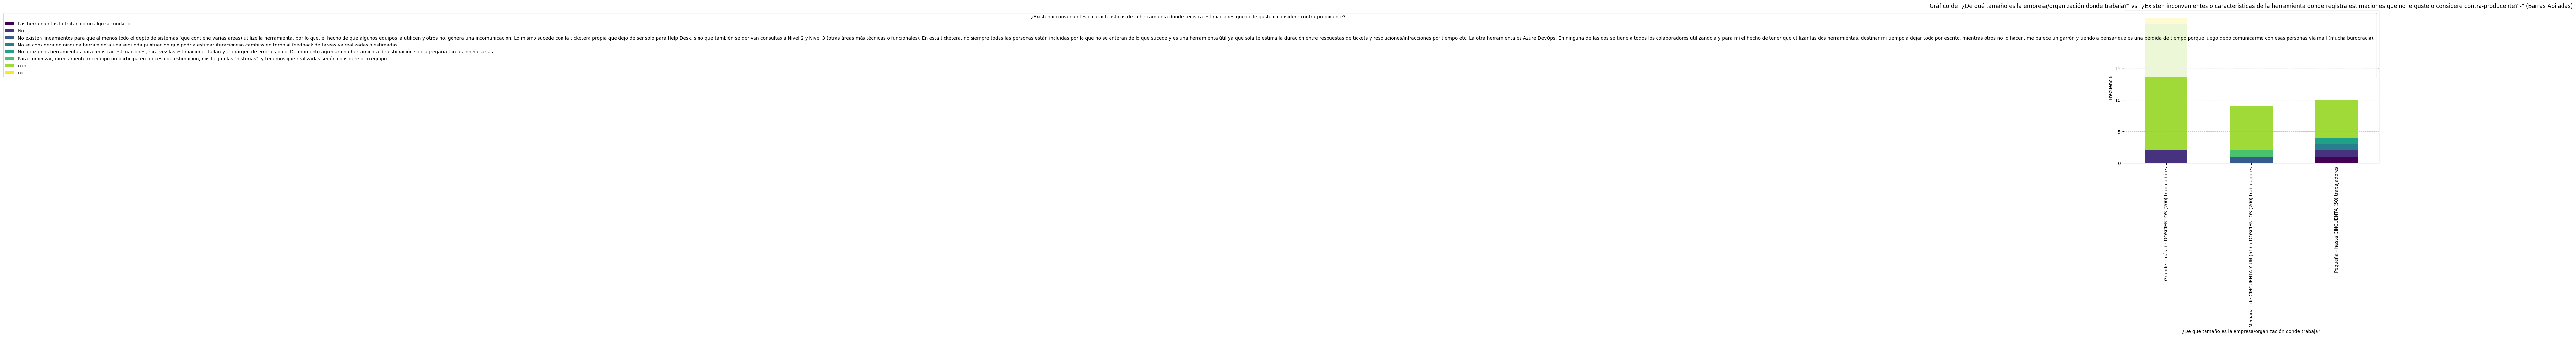

In [13]:
# Selección de las columnas por sus números
fila = 4  # Número de la primera columna
columna = 42  # Número de la segunda columna

# Validar si las columnas existen
if fila in column_labels and columna in column_labels:
    x_data = df[column_labels[fila]].astype(str)  # Asegurarse de que los datos sean categóricos
    y_data = df[column_labels[columna]].astype(str)

    # Crear tabla de frecuencia cruzada
    cross_tab = pd.crosstab(x_data, y_data)

    # Crear el gráfico de barras apiladas
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

    # Configuración del gráfico
    plt.title(f'Gráfico de "{column_labels[fila]}" vs "{column_labels[columna]}" (Barras Apiladas)')
    plt.xlabel(column_labels[fila])
    plt.ylabel('Frecuencia')
    plt.legend(title=column_labels[columna])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print(f"Las columnas {fila} o {columna} no existen en el dataframe.")


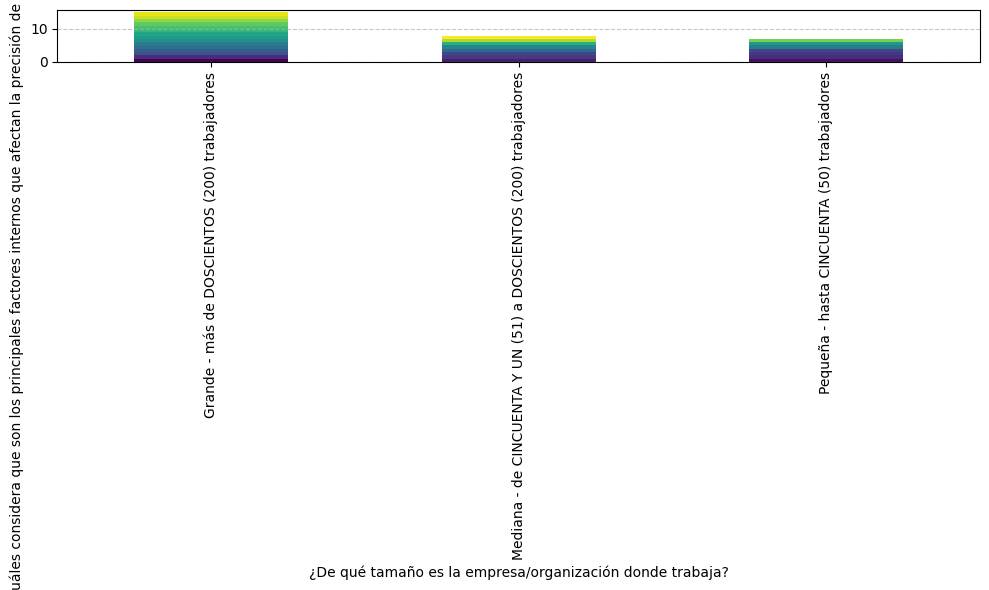

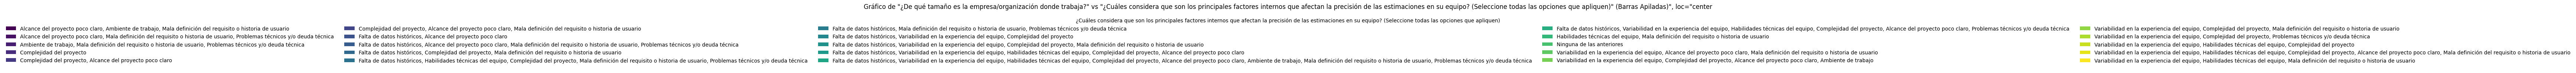

In [17]:
# Selección de las columnas por sus números
fila = 4  # Número de la primera columna
columna = 43  # Número de la segunda columna

# Validar si las columnas existen
if fila in column_labels and columna in column_labels:
    x_data = df[column_labels[fila]].astype(str)  # Asegurarse de que los datos sean categóricos
    y_data = df[column_labels[columna]].astype(str)

    # Eliminar filas con valores NaN en cualquiera de las dos columnas
    valid_data = df[[column_labels[fila], column_labels[columna]]].dropna()
    x_data = valid_data[column_labels[fila]]
    y_data = valid_data[column_labels[columna]]

    # Crear tabla de frecuencia cruzada
    cross_tab = pd.crosstab(x_data, y_data)

    # Crear el gráfico de barras apiladas sin la leyenda
    ax = cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', legend=False)

    # Configuración del gráfico
    plt.xlabel(column_labels[fila])
    plt.ylabel(column_labels[columna])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Crear figura para el título y la leyenda
    fig, ax_legend = plt.subplots(figsize=(10, 2))
    fig.patch.set_visible(False)
    ax_legend.axis('off')

    # Añadir título y leyenda
    plt.title(f'Gráfico de "{column_labels[fila]}" vs "{column_labels[columna]}" (Barras Apiladas)", loc="center')
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles, labels, title=column_labels[columna], loc='center', ncol=5, frameon=False)
    plt.show()
else:
    print(f"Las columnas {fila} o {columna} no existen en el dataframe.")
